# Fitting data

In this notebook, we will look at how to fit one and two-dimensional data. 
We will look at using `scipy.optimize` to perform achieve this, let's start by importing the necessary Python packages. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal

The `curve_fit` function allows us to define a function with input variables and axes and optimise the input variables to give the best agreement to some data. 
For example, if we have some data that we thing is quadratic in nature and we want to fit it to the function, 

$$
y = ax ^ 2 + b.
$$

First, we define a function for the above equation. 

In [2]:
def my_function(x, a, b, c):
    return a * x ** 2 + b * x + c

*Note, that the ordinate axis (or axes) must be the first argument.*
Say that we have the following data. 

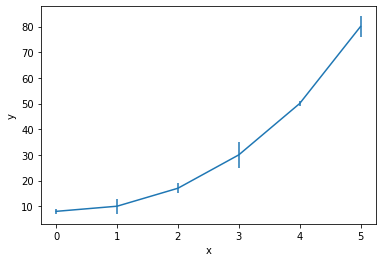

In [3]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([8, 10, 17, 30, 50, 80])
dy = np.array([1, 3, 2, 5, 1, 4])

plt.errorbar(x, y, dy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Then we can use curve fit as follows to find the optimised parameters for $a$ and $b$. 

In [4]:
popt, pcov = curve_fit(my_function, x, y, sigma=dy)

Above, `popt` is the optimise parameters and `pcov` is the covariance matrix for the optimisation (from this we can obtain the estimated uncertainty in the optimised parameters). 

In [5]:
perr = np.sqrt(np.diag(pcov))

In [6]:
print(f'a = {popt[0]:.2f}+/-{perr[0]:.2f}')
print(f'b = {popt[1]:.2f}+/-{perr[1]:.2f}')
print(f'c = {popt[2]:.2f}+/-{perr[2]:.2f}')

a = 3.22+/-0.22
b = -2.31+/-0.93
c = 8.11+/-0.54


We can visualise this optimised solution as follows.

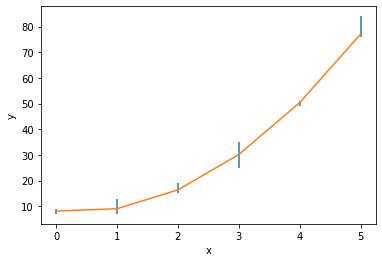

In [7]:
plt.errorbar(x, y, dy, ls='')
plt.plot(x, my_function(x, *popt))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This can also be used for a two dimensional fitting problem (such as QENS analysis). 
Here, we will apply it to fitting a two-dimensional quadratic function.
First, we must load the data that we are fitting (which is stored in an HDF5 file).

In [8]:
f = h5py.File('data/data.hdf', 'r')
x = f['entry1/data1/X'][:]
y = f['entry1/data1/Y'][:]
z = f['entry1/data1/DATA'][:]
f.close()

We will start with visualising the data.

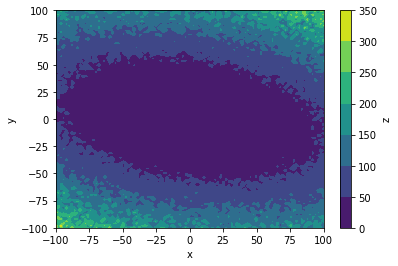

In [9]:
XY = np.meshgrid(x, y)
plt.contourf(*XY, z)
plt.colorbar(label='z')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This data can be modelled with the following equation, 

$$
z(x, y) = a x ^ 2 + b xy + c y ^ 2,
$$

where, $a$, $b$, and $c$ are parameters that we want to determine. 
We can define this with the following Python function. 

In [10]:
def my_2d_function(xy, a, b, c):
    x = xy[0]
    y = xy[1]
    return a * x ** 2 + b * x * y + c * y ** 2

*Note that the x and y data have to be passed as a single object.*
We can check that this function works be plotting some set of variables. 

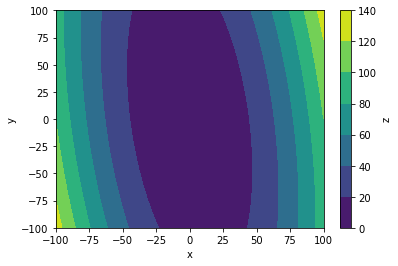

In [11]:
XY = np.meshgrid(x, y)
plt.contourf(*XY, my_2d_function(XY, 0.010, 0.002, 0.001))
plt.colorbar(label='z')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The `curve_fit` method requires that the objects being compared (the data and the model) are both "flat", i.e. one-dimensional arrays. 
Therefore, we have another function that will flatten the result of the `my_2d_function`. 

In [12]:
def my_flat_2d_function(xy, a, b, c):
    return my_2d_function(xy, a, b, c).flatten()

When we pass this and the flattened data to the `curve_fit` function to obtain the optimised parameters and covariance matrix, and therefore the uncertainties.

In [13]:
popt, pcov = curve_fit(my_flat_2d_function, XY, z.flatten())
perr = np.sqrt(np.diag(pcov))
print(f'a = {popt[0]:.2e}+/-{perr[0]:.2e}')
print(f'b = {popt[1]:.2e}+/-{perr[1]:.2e}')
print(f'c = {popt[2]:.2e}+/-{perr[2]:.2e}')

a = 5.02e-03+/-4.40e-05
b = 4.05e-03+/-4.91e-05
c = 1.51e-02+/-4.40e-05
